In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [5]:
df.shape

(404290, 6)

In [6]:
df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
352710,352710,481655,481656,Are you even really dating someone if you see ...,What should I do if I have gone on a few dates...,0
151547,151547,47297,40624,What are the safety precautions on handling sh...,What are the safety precautions on handling sh...,1
234874,234874,345469,345470,Who creates the topics on Quora?,Who defines topics on Quora?,1
99580,99580,165299,165300,Why do you think wealthy parents spoil their k...,Why do parents complain about their own parent...,0
254478,254478,369208,369209,Do microscopic living organisms such as bacter...,Is wine truly a living organism?,0
281321,281321,401079,401080,What is the Kony video all about?,Why did everyone forget about Joseph Kony so f...,0
130379,130379,207835,209257,How is mechanical branch at pec Chandigarh ?,How is the aeronautical branch at PEC Chandigarh?,0
244445,244445,357083,357084,Where was Ne-Yo born and raised?,When was Ne-Yo born?,0
60226,60226,105351,59748,How corrupt is Narendra Modi?,How corrupted is Narendra Modi?,1
232947,232947,104463,73511,How do I check who viewing your Facebook profile?,How i can know who visited my Facebook profile?,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [8]:
#missing values
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [9]:
#duplicates
df.duplicated().sum()

np.int64(0)

is_duplicate
0    255027
1    149263
Name: count, dtype: int64
is_duplicate
0    63.080215
1    36.919785
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

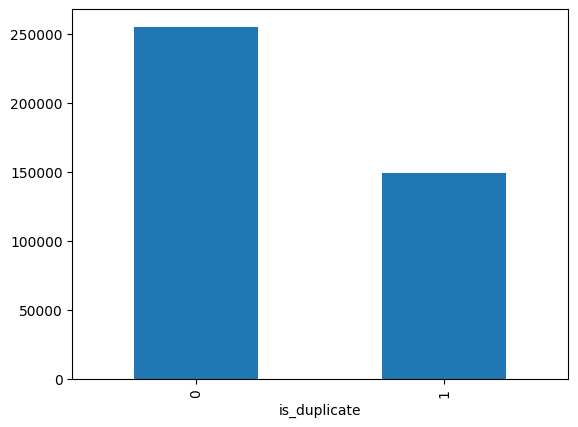

In [ ]:
#finding the distribution of duplicate and non-duplicate

print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts() / df['is_duplicate'].count())*100)  #value count ko divide krdeta h with total number of counts * 100-->Gives percentage which tells the proportion of your data
df['is_duplicate'].value_counts().plot(kind = 'bar')

Non-duplicate questions 63% 
Duplicate questions are 36%

In [12]:
#repeated questions

qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())  #both columns are converted to a list and concatenated into a single long list
print("Number of unique questions", np.unique(qid).shape[0])  #from the list, we are only grabbing unique values. shape[0] will access the first element of the shape which looks something like this--> (537933, )
x = qid.value_counts() > 1  
print("Number of questions getting repeated", x[x].shape[0]) #x[x] boolean indexing, return only the rows which are true. since we do shape[0] then it grabs the first element which looks (111780, )

Number of unique questions 537933
Number of questions getting repeated 111780


[101, 102, 103, 102, 101, 105]

qid.value_counts() would look something like this

101  2

102  2

103  1

105  1

Now from here we wanna grab those values which are greater than 1 and we store that to x


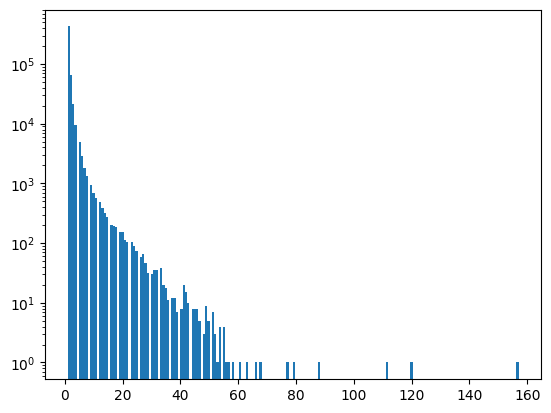

In [13]:
#histogram for repeated questions

plt.hist(qid.value_counts().values, bins = 200)  #value counts meh directly values ko grab kr rahe(jo uppar 101 ke baad 2 hai, 102 ke baad 2)--> [2, 2, 1,1]
plt.yscale('log')  #log krne se y-axis meh each step increases by the multiple of 10
plt.show()

> Inference: There is one question in our dataset that has appeared atleast 160 times. Around 5 lakh questions have appeared only 1 time

Use log scale when you have data with huge range differences